In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from plotting_functions import nn_plot_acc
from enkf_functions import enkf_classifier
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu

In [4]:
X_train, X_test, y_train, y_test = mnist_prep()

In [5]:
layers = 5
neurons = [128, 128, 64, 32, 10]

In [6]:
setting_dict = {"particles": 1,
                "epochs": 20,
                "batch_size": 1000,    # X_train.shape[0]
                "h_0": 2,
                "delta": 0.005,
                "epsilon": 0.5,
                "shuffle": True,
                "early_stopping": None
               }

In [7]:
particle_list = [100, 200, 500]

In [8]:
import time

Epoch 1. Training Accuracy: 0.423, Test Accuracy: 0.438.
Epoch 2. Training Accuracy: 0.455, Test Accuracy: 0.472.
Epoch 3. Training Accuracy: 0.465, Test Accuracy: 0.482.
Epoch 4. Training Accuracy: 0.47, Test Accuracy: 0.487.
Epoch 5. Training Accuracy: 0.473, Test Accuracy: 0.491.
Epoch 6. Training Accuracy: 0.475, Test Accuracy: 0.495.
Epoch 7. Training Accuracy: 0.478, Test Accuracy: 0.498.
Epoch 8. Training Accuracy: 0.48, Test Accuracy: 0.5.
Epoch 9. Training Accuracy: 0.481, Test Accuracy: 0.502.
Epoch 10. Training Accuracy: 0.482, Test Accuracy: 0.502.
Epoch 11. Training Accuracy: 0.483, Test Accuracy: 0.504.
Epoch 12. Training Accuracy: 0.484, Test Accuracy: 0.504.
Epoch 13. Training Accuracy: 0.484, Test Accuracy: 0.504.
Epoch 14. Training Accuracy: 0.484, Test Accuracy: 0.503.
Epoch 15. Training Accuracy: 0.485, Test Accuracy: 0.504.
Epoch 16. Training Accuracy: 0.486, Test Accuracy: 0.505.
Epoch 17. Training Accuracy: 0.486, Test Accuracy: 0.505.
Epoch 18. Training Accuracy

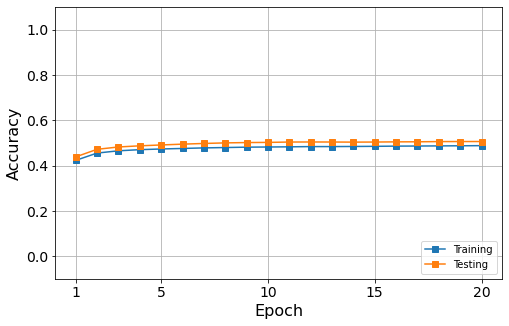

Epoch 1. Training Accuracy: 0.503, Test Accuracy: 0.506.
Epoch 2. Training Accuracy: 0.563, Test Accuracy: 0.563.
Epoch 3. Training Accuracy: 0.575, Test Accuracy: 0.575.
Epoch 4. Training Accuracy: 0.581, Test Accuracy: 0.581.
Epoch 5. Training Accuracy: 0.585, Test Accuracy: 0.585.
Epoch 6. Training Accuracy: 0.588, Test Accuracy: 0.589.
Epoch 7. Training Accuracy: 0.59, Test Accuracy: 0.59.
Epoch 8. Training Accuracy: 0.592, Test Accuracy: 0.592.
Epoch 9. Training Accuracy: 0.595, Test Accuracy: 0.596.
Epoch 10. Training Accuracy: 0.596, Test Accuracy: 0.597.
Epoch 11. Training Accuracy: 0.598, Test Accuracy: 0.598.
Epoch 12. Training Accuracy: 0.599, Test Accuracy: 0.601.
Epoch 13. Training Accuracy: 0.601, Test Accuracy: 0.601.
Epoch 14. Training Accuracy: 0.602, Test Accuracy: 0.603.
Epoch 15. Training Accuracy: 0.602, Test Accuracy: 0.603.
Epoch 16. Training Accuracy: 0.604, Test Accuracy: 0.604.
Epoch 17. Training Accuracy: 0.605, Test Accuracy: 0.606.
Epoch 18. Training Accura

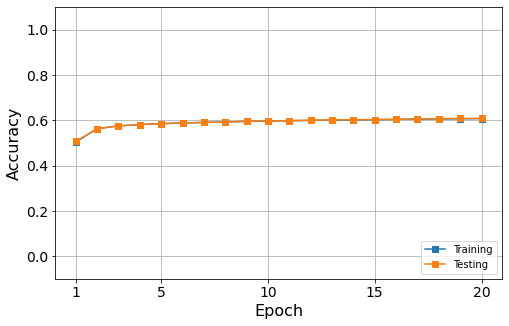

Epoch 1. Training Accuracy: 0.471, Test Accuracy: 0.48.
Epoch 2. Training Accuracy: 0.619, Test Accuracy: 0.626.
Epoch 3. Training Accuracy: 0.659, Test Accuracy: 0.664.
Epoch 4. Training Accuracy: 0.683, Test Accuracy: 0.691.
Epoch 5. Training Accuracy: 0.696, Test Accuracy: 0.705.
Epoch 6. Training Accuracy: 0.705, Test Accuracy: 0.713.
Epoch 7. Training Accuracy: 0.71, Test Accuracy: 0.718.
Epoch 8. Training Accuracy: 0.714, Test Accuracy: 0.722.
Epoch 9. Training Accuracy: 0.717, Test Accuracy: 0.725.
Epoch 10. Training Accuracy: 0.721, Test Accuracy: 0.727.
Epoch 11. Training Accuracy: 0.724, Test Accuracy: 0.73.
Epoch 12. Training Accuracy: 0.726, Test Accuracy: 0.732.
Epoch 13. Training Accuracy: 0.728, Test Accuracy: 0.733.
Epoch 14. Training Accuracy: 0.73, Test Accuracy: 0.735.
Epoch 15. Training Accuracy: 0.731, Test Accuracy: 0.736.
Epoch 16. Training Accuracy: 0.733, Test Accuracy: 0.736.
Epoch 17. Training Accuracy: 0.734, Test Accuracy: 0.738.
Epoch 18. Training Accuracy

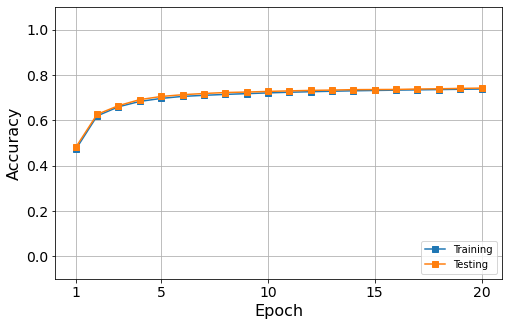

In [9]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    
    start_time = time.time()
    mean_model = enkf_classifier(X_train,
                                 X_test,
                                 y_train,
                                 y_test,
                                 layers,
                                 neurons,
                                 setting_dict,
                                 save_all = True,
                                 file_var = "../objects/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                 file_model = "../models/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                 verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    
    nn_plot_acc(mean_model,
                mean_comparison = None,
                start_epoch = 1,
                save = None)#"../img/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [10]:
obj_dict = load_objects("../objects/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [11]:
final_model = nn_load("../models/mnist/mnist_enkf_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))